# Project 2
## Image Classification with CNN
-------------------------------
 **Felipe Carvajal     Cod. 201728562

 **Nicolás Bernal      Cod. 201014697

## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
   * Discuss the results.

In [1493]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix
import os, json
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

In [1115]:
path_egret = 'datasets/birds/egret/'

In [1178]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(path_egret, 'egr002.jpg')
img = image.load_img(img_path, target_size=(224, 224))

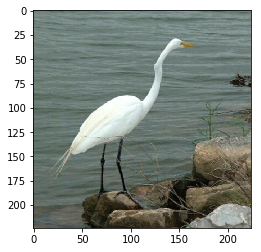

In [1179]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(img)

In [1183]:
path_egret = 'datasets/birds/egret/'
path_mandarin = 'datasets/birds/mandarin/'
path_owl = 'datasets/birds/owl/'
path_puffin = 'datasets/birds/puffin/'
path_toucan = 'datasets/birds/toucan/'
path_wood_duck = 'datasets/birds/wood_duck/'

In [1184]:
from skimage.transform import rescale, resize, downscale_local_mean
images_training = []
for filename in os.listdir(path_egret):
    images = resize(io.imread(os.path.join(path_egret, filename)), (224, 224), mode='constant', anti_aliasing=False)
    images_training.append(images)

In [1185]:
for filename in os.listdir(path_mandarin):
    images_training.append(resize(io.imread(os.path.join(path_mandarin, filename)),
                    (224, 224), mode='constant', anti_aliasing=False))

In [1186]:
for filename in os.listdir(path_owl):
    images_training.append(resize(io.imread(os.path.join(path_owl, filename)),
                    (224, 224), mode='constant', anti_aliasing=False))

In [1187]:
for filename in os.listdir(path_puffin):
    images_training.append(resize(io.imread(os.path.join(path_puffin, filename)),
                    (224, 224), mode='constant', anti_aliasing=False))

In [1188]:
for filename in os.listdir(path_toucan):
    images_training.append(resize(io.imread(os.path.join(path_toucan, filename)),
                    (224, 224), mode='constant', anti_aliasing=False))

In [1189]:
for filename in os.listdir(path_wood_duck):
    images_training.append(resize(io.imread(os.path.join(path_wood_duck, filename)),
                    (224, 224), mode='constant', anti_aliasing=False))

C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt E

In [1206]:
images_training = np.stack(images_training)
images_training[0].shape, images_training.shape[0]

((224, 224, 3), 600)

In [1483]:
path = 'datasets/birds/'

In [1484]:
batch_size = 4
gen=image.ImageDataGenerator()

trn_batches = gen.flow_from_directory(path, target_size=(224,224), batch_size=batch_size, class_mode='categorical')

Found 600 images belonging to 6 classes.


In [1485]:
imgs, labels = next(trn_batches)

In [1486]:
def plot_imgs(imgs, figsize=(12,10), rows=1, titles=None):
    figs = plt.figure(figsize=figsize)
    for i in range(len(imgs)):
        fig = figs.add_subplot(rows, len(imgs)//rows, i+1)
        fig.axis('Off')
        if titles is not None:
            fig.set_title(titles[i], fontsize=16)
        plt.imshow(imgs[i].astype(np.uint8))

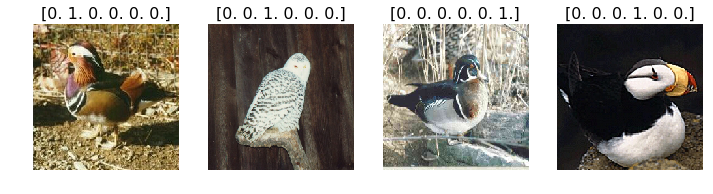

In [1487]:
plot_imgs(imgs, titles=labels)

In [1488]:
gen = image.ImageDataGenerator()
trn_batches = gen.flow_from_directory(path, target_size=(224,224), batch_size=600, class_mode='categorical')

Found 600 images belonging to 6 classes.


In [1489]:
imgs, labels = next(trn_batches)

C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt E

In [1490]:
from keras.applications.vgg16 import VGG16
vgg_conv = VGG16()

In [1494]:
fpath = 'j/imagenet_class_index.json'
with open(fpath) as f:
    class_dict = json.load(f)
all_classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [1495]:
# predict probability of each class for each image
all_preds = vgg_conv.predict(imgs)
# for each image get the index of the class with max probability
idxs = np.argmax(all_preds, axis=1)
print(idxs)
# get the values of the highest probability for each image
preds = [all_preds[i, idxs[i]] for i in range(len(idxs))]
print(np.array(preds))
# get the label of the class with the highest probability for each image
classes = [all_classes[idx] for idx in idxs]
print(classes)

[132 146 132  97 132 868 148  97 130 117  17  18  97 895 973 115 604  18
 132 132 132 132  81  97  81 299 801 132  97 132 849 643 145 132  96  96
 146 146  96  81 801  24  97 132  97  96 132 971 130 125 137 107 146  81
  85 132  21 132  97  97  96  18  97 132 132 794  96  81 134  97  21 144
  21 141  96  85 144 971 849  89  21   6 137  96  58 120 574 921 132 132
 166 356  36 146  96 132  96 132  81  96  81  97 146 801  99  36  96  96
 146 971  97 146  96 115  81  80  36  58 132 134  87  81  81  96 973  81
 148  89  93  97  96  97  96  97  82 146 793  85  18  81 127  97 132 131
  96  96  96 132  97 146  97 144 137 695 132 773 973 124 132 396 132  96
 801 132  97   8  97  97  86 611 132 132 349 132  24 117  85  97 773  81
  96  96  97   5  96 971  97 801  85  93 132 132 146  81 115 132 145 719
 135  82  21  87 134  89 132  96  97  96  96 131 129  96  96  96  97 719
  34 132 117  81  96 130 132  97 773 132 299  81  87 132  97  50 146  96
  81  96  81 879 146  83 132  86  23 146  81 132 13

 0.11237758 0.693964   0.99960726 0.28104565 0.996259   0.7183518 ]
['American_egret', 'albatross', 'American_egret', 'drake', 'American_egret', 'tray', 'killer_whale', 'drake', 'flamingo', 'chambered_nautilus', 'jay', 'magpie', 'drake', 'warplane', 'coral_reef', 'sea_slug', 'hourglass', 'magpie', 'American_egret', 'American_egret', 'American_egret', 'American_egret', 'ptarmigan', 'drake', 'ptarmigan', 'meerkat', 'snorkel', 'American_egret', 'drake', 'American_egret', 'teapot', 'mask', 'king_penguin', 'American_egret', 'toucan', 'toucan', 'albatross', 'albatross', 'toucan', 'ptarmigan', 'snorkel', 'great_grey_owl', 'drake', 'American_egret', 'drake', 'toucan', 'American_egret', 'bubble', 'flamingo', 'hermit_crab', 'American_coot', 'jellyfish', 'albatross', 'ptarmigan', 'quail', 'American_egret', 'kite', 'American_egret', 'drake', 'drake', 'toucan', 'magpie', 'drake', 'American_egret', 'American_egret', 'shower_curtain', 'toucan', 'ptarmigan', 'crane', 'drake', 'kite', 'pelican', 'kite'

In [1496]:
a = np.array([all_preds[0]])
indices = np.argpartition(a, -10, axis=1)[:, -10:]
indices

array([[135,  65, 127, 128,  58, 129, 131, 132, 134, 130]], dtype=int64)

In [1497]:
indices = np.argpartition(all_preds, -10, axis=1)[:, -10:]
indices

array([[135,  65, 127, ..., 132, 134, 130],
       [850, 149,  98, ..., 146, 148, 128],
       [144,   9, 135, ..., 129, 132, 134],
       ...,
       [975, 973,   6, ..., 983, 344, 118],
       [ 82, 356,  83, ...,   8,  81,  89],
       [971,  85, 898, ...,  17,  81,  84]], dtype=int64)

In [1498]:
lista1 = np.array([indices[i,j] for i in range(len(idxs)) for j in range(0,10)])
lista1

array([135,  65, 127, ...,  17,  81,  84], dtype=int64)

In [1499]:
lista2 = np.array([all_classes[lista1] for lista1 in lista1])
print(lista2.reshape(600,10))

[['limpkin' 'sea_snake' 'white_stork' ... 'American_egret' 'crane'
  'flamingo']
 ['teddy' 'dugong' 'red-breasted_merganser' ... 'albatross'
  'killer_whale' 'black_stork']
 ['pelican' 'ostrich' 'limpkin' ... 'spoonbill' 'American_egret' 'crane']
 ...
 ['lakeside' 'coral_reef' 'stingray' ... 'scuba_diver' 'hippopotamus'
  'Dungeness_crab']
 ['ruffed_grouse' 'weasel' 'prairie_chicken' ... 'hen' 'ptarmigan'
  'sulphur-crested_cockatoo']
 ['bubble' 'quail' 'water_bottle' ... 'jay' 'ptarmigan' 'peacock']]


Podemos observar en la matriz anterior que la mayoria de predicciones estan asociadas a imagenes de aves pero no necesariamente a la categoria de las aves disponibles en el dataset. Sin embargo, se puede ver que existen algunas clasificaciones correctas entre las 10 categorias mas frecuentes del modelo, es decir, la categoría correcta puede estar dentro de las 10 clasificaciones más frecuentes, pero no necesariamente asociada a la mayor probabilidad.
Esto se puede confirmar con la linea de corrida (1495) en donde se asocian las probabilidades y las clasificaciones del algoritmo cara cada una de las 600 imágenes de aves.

## 2. Transfer learning
   * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 

In [1439]:
path = 'datasets/birds/'

In [1440]:
gen = image.ImageDataGenerator()
images_training = gen.flow_from_directory(path, target_size=(224,224), batch_size=600,class_mode='categorical')

Found 600 images belonging to 6 classes.


In [1441]:
images_training, y_train = next(images_training)

C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\felip\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt E

In [1442]:
images_training.shape

(600, 224, 224, 3)

In [1443]:
Y_train.shape

(600, 6)

In [1444]:
X_train, X_test, y_train, y_test = train_test_split(images_training, Y_train, test_size=0.30, random_state=42)

In [1450]:
from keras.applications.vgg16 import VGG16
transfer_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1452]:
X_train_transfer = transfer_VGG16.predict(X_train)
X_test_transfer = transfer_VGG16.predict(X_test)

In [1453]:
model = models.Sequential()

model.add(Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_69 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 6)                 1542      
Total params: 6,424,326
Trainable params: 6,424,326
Non-trainable params: 0
_________________________________________________________________


In [1454]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [1455]:
model.fit(X_train_transfer, y_train, epochs=30, verbose=2)

Epoch 1/30
 - 2s - loss: 13.3216 - acc: 0.1595
Epoch 2/30
 - 1s - loss: 13.3193 - acc: 0.1690
Epoch 3/30
 - 1s - loss: 13.0814 - acc: 0.1881
Epoch 4/30
 - 1s - loss: 12.9655 - acc: 0.1952
Epoch 5/30
 - 1s - loss: 12.9717 - acc: 0.1952
Epoch 6/30
 - 1s - loss: 12.9329 - acc: 0.1976
Epoch 7/30
 - 1s - loss: 12.9712 - acc: 0.1952
Epoch 8/30
 - 1s - loss: 12.8504 - acc: 0.2024
Epoch 9/30
 - 1s - loss: 12.9059 - acc: 0.1976
Epoch 10/30
 - 1s - loss: 13.0096 - acc: 0.1929
Epoch 11/30
 - 1s - loss: 12.9744 - acc: 0.1929
Epoch 12/30
 - 1s - loss: 12.6644 - acc: 0.2143
Epoch 13/30
 - 1s - loss: 12.7427 - acc: 0.2071
Epoch 14/30
 - 1s - loss: 12.4945 - acc: 0.2214
Epoch 15/30
 - 1s - loss: 12.6113 - acc: 0.2167
Epoch 16/30
 - 1s - loss: 12.6646 - acc: 0.2119
Epoch 17/30
 - 1s - loss: 13.0763 - acc: 0.1857
Epoch 18/30
 - 1s - loss: 12.8382 - acc: 0.2000
Epoch 19/30
 - 1s - loss: 12.5569 - acc: 0.2167
Epoch 20/30
 - 1s - loss: 12.6381 - acc: 0.2143
Epoch 21/30
 - 1s - loss: 12.1804 - acc: 0.2429
E

In [1461]:
y_pred_transfer = model.predict(X_test_transfer)

In [1464]:
y_pred_transfer

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [1468]:
score = model.evaluate(X_test_transfer, y_test)

180/180 [==============================] - ETA:  - 0s 400us/step


In [1469]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 14.086269972059462
Test accuracy: 0.12222222238779068


In [1471]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, X_test_transfer)

La evaluacion del modelo se realizo por el accuracy que segun el modelo pre entrenado y adicionando dos capas ocultas es del 12%. Se puede concluir que la clasificacion realizada de este modelo para la base de datos de aves no es buena, dado que el modelo asocia probabilidades a diferentes clasificaciones, que segun la imagen prodria no ser la correcta.  

## 3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

In [1477]:
X_train, X_test, y_train, y_test = train_test_split(images_training, Y_train, test_size=0.30, random_state=42)

In [1478]:
X_train[0].shape

(224, 224, 3)

In [1479]:
from keras.applications.vgg16 import VGG16
tuning_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
tuning_VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1480]:
for layer in tuning_VGG16.layers[:-18]:
    layer.trainable = False

for layer in tuning_VGG16.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x000002C0D6E69198> False
<keras.layers.convolutional.Conv2D object at 0x000002C0D6EB4B00> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6E274A8> True
<keras.layers.pooling.MaxPooling2D object at 0x000002C0D6F64940> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6F52390> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6EEEDA0> True
<keras.layers.pooling.MaxPooling2D object at 0x000002C0D6EB4048> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6FFB6D8> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6ED4978> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D7013940> True
<keras.layers.pooling.MaxPooling2D object at 0x000002C0D6F2FE48> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D6F0D4A8> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D703EDA0> True
<keras.layers.convolutional.Conv2D object at 0x000002C0D702F630> True
<keras.layers.poolin

In [1481]:
X_train_tuning = tuning_VGG16.predict(X_train)
X_test_tuning = tuning_VGG16.predict(X_test)

In [1431]:
model = models.Sequential()

model.add(Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_67 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 6)                 1542      
Total params: 21,139,014
Trainable params: 21,139,014
Non-trainable params: 0
_________________________________________________________________


In [1500]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [1501]:
model.fit(X_train_tuning, y_train, epochs=30, verbose=2)

Epoch 1/30
 - 2s - loss: 12.2347 - acc: 0.2381
Epoch 2/30
 - 1s - loss: 12.5038 - acc: 0.2214
Epoch 3/30
 - 1s - loss: 12.4492 - acc: 0.2262
Epoch 4/30
 - 1s - loss: 12.2436 - acc: 0.2381
Epoch 5/30
 - 1s - loss: 11.9734 - acc: 0.2571
Epoch 6/30
 - 1s - loss: 11.9861 - acc: 0.2524
Epoch 7/30
 - 1s - loss: 12.1903 - acc: 0.2429
Epoch 8/30
 - 1s - loss: 12.1132 - acc: 0.2476
Epoch 9/30
 - 1s - loss: 12.0943 - acc: 0.2476
Epoch 10/30
 - 1s - loss: 12.2136 - acc: 0.2381
Epoch 11/30
 - 1s - loss: 12.4545 - acc: 0.2262
Epoch 12/30
 - 1s - loss: 12.5107 - acc: 0.2238
Epoch 13/30
 - 1s - loss: 12.5113 - acc: 0.2238
Epoch 14/30
 - 1s - loss: 12.3127 - acc: 0.2333
Epoch 15/30
 - 1s - loss: 12.0916 - acc: 0.2476
Epoch 16/30
 - 1s - loss: 11.9734 - acc: 0.2571
Epoch 17/30
 - 1s - loss: 12.0502 - acc: 0.2524
Epoch 18/30
 - 1s - loss: 12.3956 - acc: 0.2310
Epoch 19/30
 - 1s - loss: 12.1742 - acc: 0.2429
Epoch 20/30
 - 1s - loss: 11.9852 - acc: 0.2548
Epoch 21/30
 - 1s - loss: 12.6311 - acc: 0.2143
E

In [1502]:
y_pred_tuning = model.predict(X_test_tuning)

In [1503]:
score = model.evaluate(X_test_transfer, y_test)

180/180 [==============================] - ETA:  - ETA:  - 1s 4ms/step


In [1504]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 13.789926147460937
Test accuracy: 0.1444444446100129


In [1482]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred_tuning)

La evaluacion del modelo se realizo por el accuracy que segun el modelo pre entrenado, permitiendo que todos las capas sean entrenadas y adicionando dos capas ocultas es del 14%. Se puede concluir que la clasificacion realizada de este modelo para la base de datos de aves no es buena, dado que el modelo asocia probabilidades a diferentes clasificaciones, que segun la imagen prodria no ser la correcta.
Aunque el modelo sigue sin ser bueno, respecto al modelo anterior mejoró, esto, por los inputs del modelo con el dataset de aves ya entrenado en todas las capas.